In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
%pylab inline
from datetime import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
trips = pd.read_csv('201510-citibike-tripdata.csv')
print trips.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
print trips.gender.head(20)

0     1
1     1
2     1
3     1
4     0
5     0
6     1
7     1
8     2
9     1
10    2
11    1
12    1
13    1
14    2
15    1
16    1
17    1
18    2
19    2
Name: gender, dtype: int64


In [4]:
type(trips.starttime[6])

str

In [5]:
# print trips.starttime.head(20)

In [6]:
trips.starttime = pd.to_datetime(trips.starttime)

In [7]:
# print trips.starttime.head(20)
print type(trips.starttime[6])

<class 'pandas.tslib.Timestamp'>


In [10]:
trips.hr = trips.starttime.dt.hour
# print trips.hr.head(20)

In [11]:
trips.age = 2015-trips['birth year']
print trips.age.head()

0    42
1    25
2    31
3    31
4   NaN
Name: birth year, dtype: float64


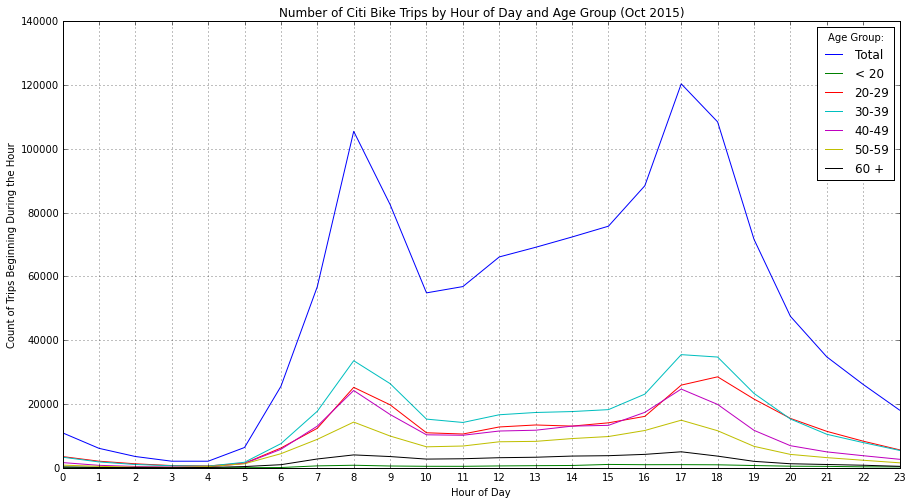

In [13]:
pl.figure(figsize=(15,8))
pl.plot(range(0,24), trips['start station id'].groupby(trips.hr).count(), label='Total')
pl.plot(range(0,24), trips['start station id'][trips.age < 20].groupby(trips.hr).count(), label='< 20')
pl.plot(range(0,24), trips['start station id'][(trips.age >= 20) & (trips.age < 30)].groupby(trips.hr).count(), label='20-29')
pl.plot(range(0,24), trips['start station id'][(trips.age >= 30) & (trips.age < 40)].groupby(trips.hr).count(), label='30-39')
pl.plot(range(0,24), trips['start station id'][(trips.age >= 40) & (trips.age < 50)].groupby(trips.hr).count(), label='40-49')
pl.plot(range(0,24), trips['start station id'][(trips.age >= 50) & (trips.age < 60)].groupby(trips.hr).count(), label='50-59')
pl.plot(range(0,24), trips['start station id'][trips.age >= 60].groupby(trips.hr).count(), label='60 +')

pl.grid()
pl.xticks(range(0,25))
pl.xlim(0,23)
pl.title('Number of Citi Bike Trips by Hour of Day and Age Group (Oct 2015)')
pl.xlabel('Hour of Day')
pl.ylabel('Count of Trips Beginning During the Hour')
pl.legend(title='Age Group:')